In [46]:
import math, random
import matplotlib
import matplotlib.pyplot as plt

In [10]:
def dot(v, w):
    # computes v_1 * w_1 + ... + v_n * w_n
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

# Perceptrons

In [3]:
def step_function(x):
    return 1 if x >= 0 else 0


def perceptron_output(weights, bias, x):
    """returns 1 if the perceptron 'fires', 0 if not"""
    calculation = dot(weights, x) + bias
    return step_function(calculation)

In [4]:
and_gate = min
or_gate = max
xor_gate = lambda x, y: 0 if x ==y else 1

# Feed forward neural networks

In [6]:
def sigmoid(t):
    return 1 / (1 + math.exp(-t))


def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))

In [7]:
def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it

        # the input to the next layer is the output of this one
        input_vector = output

    return outputs

In [13]:
xor_network = [
    [[20, 20, -30],
     [20, 20, -10]],
    
     [[-60, 60, -30]]
]

for x in [0, 1]:
    for y in [0, 1]:
        print(x, y, feed_forward(xor_network, [x, y]) [-1])

0 0 [9.38314668300676e-14]
0 1 [0.9999999999999059]
1 0 [0.9999999999999059]
1 1 [9.383146683006828e-14]


# Backpropagation

In [14]:
def backpropagate(network, input_vector, target):

    hidden_outputs, outputs = feed_forward(network, input_vector)

    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target[i])
                     for i, output in enumerate(outputs)]

    # adjust weights for output layer (network[-1])
    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i] * hidden_output

    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                      dot(output_deltas, [n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]

    # adjust weights for hidden layer (network[0])
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

# Example: captcha overcoming 

In [26]:
# let's represent each digit in the form of a 5 x 5 pixel image
raw_digits = [
"""
   11111
   1...1
   1...1
   1...1
   11111""",

"""..1..
   ..1..
   ..1..
   ..1..
   ..1..""",

"""11111
   ....1
   11111
   1....
   11111""",

"""11111
   ....1
   11111
   ....1
   11111""",

"""1...1
   1...1
   11111
   ....1
   ....1""",

"""11111
   1....
   11111
   ....1
   11111""",

"""11111
   1....
   11111
   1...1
   11111""",

"""11111
   ....1
   ....1
   ....1
   ....1""",

"""11111
   1...1
   11111
   1...1
   11111""",

"""11111
   1...1
   11111
   ....1
   11111 """
]

In [27]:
def make_digit(raw_digit):
    return [1 if c == '1' else 0
            for row in raw_digit.split("\n")
            for c in row.strip()]

inputs = list(map(make_digit, raw_digits))

In [28]:
targets = [[1 if i == j else 0 for i in range(10)]
           for j in range(10)]

In [29]:
random.seed(0)   # to get repeatable results
input_size = 25  # each input is a vector of length 25
num_hidden = 5   # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

In [30]:
# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for __ in range(input_size + 1)]
                for __ in range(num_hidden)]

In [31]:
# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for __ in range(num_hidden + 1)]
                for __ in range(output_size)]

In [32]:
# the network starts out with random weights
network = [hidden_layer, output_layer]

In [33]:
# 10,000 iterations seems enough to converge
for __ in range(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

In [34]:
def predict(input):
    return feed_forward(network, input)[-1]

In [35]:
# let's try numeral 7
predict(inputs[7])

[0.024099252251227495,
 6.535805275537946e-06,
 7.82498285497602e-11,
 0.017301919554017466,
 0.0011793422713514314,
 6.648285303812686e-10,
 4.480803518696326e-08,
 0.969007735053818,
 1.0889968608877994e-08,
 2.565215480544878e-08]

In [36]:
# let's try stylized numeral 3
predict(  [0,1,1,1,0,    # .@@@.
           0,0,0,1,1,    # ...@@
           0,0,1,1,0,    # ..@@.
           0,0,0,1,1,    # ...@@
           0,1,1,1,0])   # .@@@.

[8.089379748597191e-09,
 0.0015111927756024143,
 1.2269558364879473e-08,
 0.9449497176995292,
 6.320723731390414e-07,
 4.772839810266144e-06,
 2.566661329270676e-10,
 0.009159247290970103,
 6.425186805525349e-08,
 0.1296193147755028]

In [55]:
# and stylized numeral 8
predict(  [0,1,1,1,0,    # .@@@.
           1,0,0,1,1,    # @..@@
           0,1,1,1,0,    # .@@@.
           1,0,0,1,1,    # @..@@
           0,1,1,1,0])   # .@@@.

[2.8398960946147525e-06,
 3.420730717233115e-13,
 7.377641549372272e-09,
 0.0003464790956137235,
 1.3653801311139735e-10,
 0.5915126275536223,
 2.9656227284800537e-05,
 1.7741535556168957e-07,
 0.9492129655894995,
 0.9961441866705154]

In [53]:
# now we will use pyplot.imshow function
def show_weights(neuron_idx):
    weights = network[0][0]
    abs_weights = list(map(abs, weights))

    grid = [abs_weights[row:(row+5)]         # turn the weights into a 5x5 grid
            for row in range(0,25,5)]        # [weights[0:5], ..., weights[20:25]]

    ax = plt.gca()                           # to use hatching, we'll need the axis

    ax.imshow(grid,                          # here same as plt.imshow
              cmap=matplotlib.cm.binary,     # use white-black color scale
              interpolation='none')          # plot blocks as blocks

    # cross-hatch the negative weights
    for i in range(5):                       # row
        for j in range(5):                   # column
            if weights[5*i + j] < 0:         # row i, column j = weights[5*i + j]
                ax.add_patch(patch(j, i, '/', "white"))   # add black and white hatches, so visible whether dark or light
                ax.add_patch(patch(j, i, '\\', "black"))
    plt.show()

network[0][0]


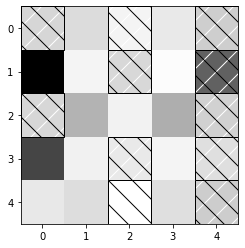

In [75]:
print('network[0][0]')
show_weights(0)

network[0][1]


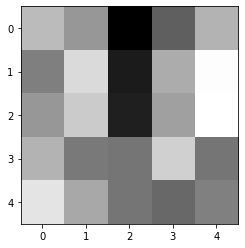

In [76]:
print('network[0][1]')
show_weights(1)

network[0][2]


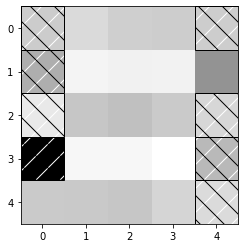

In [77]:
print('network[0][2]')
show_weights(2)

network[0][3]


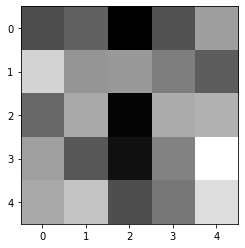

In [78]:
print('network[0][3]')
show_weights(3)

network[0][4]


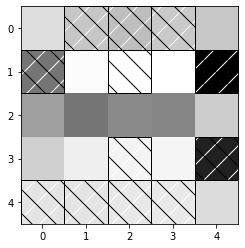

In [79]:
print('network[0][4]')
show_weights(4)

In [80]:
# left column only
left_column_only = [1, 0, 0, 0, 0] * 5
print(feed_forward(network, left_column_only) [0][0])

0.9999757061230374


In [81]:
# center, middle line
center_middle_line = [0, 0, 0, 0, 0] * 2 + [0, 1, 1, 1, 0] + [0, 0, 0, 0, 0] * 2
print(feed_forward(network, center_middle_line) [0][0])

0.9454650524875013


In [85]:
# right column only
right_column_only = [0, 0, 0, 0, 1] * 5
print(feed_forward(network, right_column_only) [0][0])

2.0967428729819267e-09


In [86]:
my_three = [0,1,1,1,0,    # .@@@.
            0,0,0,1,1,    # ...@@
            0,0,1,1,0,    # ..@@.
            0,0,0,1,1,    # ...@@
            0,1,1,1,0]    # .@@@.

In [89]:
hidden, ouput = feed_forward(network, my_three)

In [91]:
hidden  # network[0][0]
        # network[0][1]
        # network[0][2]
        # network[0][3]
        # network[0][4]

[0.10087970544675262,
 0.9999789525258017,
 0.9999999995375104,
 0.999992327786406,
 2.5371920979367814e-07]